In [1]:
%matplotlib inline

import keras

from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam,SGD
import tensorflow as tf

from keras import backend as k
import h5py
import matplotlib.pyplot as plt
import numpy as np
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import math
from keras.callbacks import ModelCheckpoint


from keras.models import Sequential
from keras.layers import Dense, Activation,Input
import numpy as np
import warnings

from keras.layers import Input
from keras import layers
from keras.layers import Dense
from keras.layers import Activation,Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import ZeroPadding2D
from keras.layers import AveragePooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.layers import concatenate
from keras.models import Model
from keras.preprocessing import image
import keras.backend as K
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import decode_predictions
from keras.regularizers import l2
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import _obtain_input_shape
from keras.engine.topology import get_source_inputs
from keras.layers import Input, Lambda, Activation, Conv2D, MaxPooling2D, ZeroPadding2D, Reshape, Concatenate

Using TensorFlow backend.


In [2]:
def VGG16(include_top=True,input_tensor=None, input_shape=None,dropout=0.3):

    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=48,
                                      data_format=K.image_data_format(),
                                      require_flatten=False
                                      )

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    img_input=Input(shape=(48,48,1))
    
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    # Block 1
    x = Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    
    x = Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)

    # Block 2
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(256, (3, 3), activation='relu', name='block4_conv1')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(256, (3, 3), activation='relu' , name='block4_conv2')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(256, (3, 3), activation='relu' , name='block4_conv3')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    '''
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    '''
   # x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
    '''
    x = Flatten(name='flatten')(x)
    x = Dense(512, activation='relu', name='fc1')(x)
    x = Dense(128, activation='relu', name='fc2')(x)
    x = Dense(7, activation='softmax', name='predictions')(x)
    '''
    

    x = Conv2D(128, (3, 3), activation='relu',padding='same')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(64, (3, 3), activation='relu',padding='same')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(32, (3, 3), activation='relu',padding='same')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(7, (3, 3), activation='relu')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = GlobalAveragePooling2D(name='Global_pool')(x)
    x= Activation('softmax')(x)

    



    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='vgg16')

    # load weights



    return model

In [3]:
def VGG16(include_top=True,input_tensor=None, input_shape=None,dropout=0.3):

    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=48,
                                      data_format=K.image_data_format(),
                                      require_flatten=False
                                      )

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    img_input=Input(shape=(48,48,1))
    
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    # Block 1
    x = Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    
    x = Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)

    # Block 2
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu',padding='same', name='block4_conv1')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(512, (3, 3), activation='relu' ,padding='same', name='block4_conv2')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(512, (3, 3), activation='relu' ,padding='same', name='block4_conv3')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2),padding='same', name='block4_pool')(x)

    # Block 5
 
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x=Dropout(dropout)(x)
    
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
   
    x = Flatten(name='flatten')(x)
    x = Dense(1024, activation='relu', name='fc1')(x)
    x=Dropout(dropout)(x)
    x = Dense(512, activation='relu', name='fc2')(x)
    x=Dropout(dropout)(x)
    x = Dense(7, activation='softmax', name='predictions')(x)
  
    

    

    



    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='vgg16')

    # load weights



    return model

In [4]:
model=VGG16(dropout=0.5)

model.summary()

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 48, 32)        0         
__________

In [6]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

In [7]:
x_train=np.load('./x_k_train.npy')
y_train=np.load('./y_k_train.npy')
x_test=np.load('./x_k_test.npy')
y_test=np.load('./y_k_test.npy')

In [8]:
x_train.shape

(26915, 48, 48, 1)

In [9]:

x_train=x_train/255
x_test=x_test/255

In [10]:
import sklearn.preprocessing
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(y_train)+1))
y_train = label_binarizer.transform(y_train)
y_test = label_binarizer.transform(y_test)

In [11]:
import numpy as np


def get_random_eraser(p=0.2, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [12]:
datagen = ImageDataGenerator()
    

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)


In [13]:
filepath="./checkpointvgg/weights-6-8-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [14]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.1
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate
lrate = LearningRateScheduler(step_decay)

In [15]:
callbacks_list = [checkpoint]

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [32]:
x_train.shape

(26915, 48, 48, 1)

In [33]:
keras.backend.get_session().run(tf.global_variables_initializer())


model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) /64, epochs=200,callbacks=callbacks_list,
                    validation_data=(x_test, y_test))


Epoch 1/200
421/420 [==============================] - 51s 122ms/step - loss: 1.9995 - acc: 0.2242 - val_loss: 1.9476 - val_acc: 0.2542

Epoch 00001: val_acc improved from -inf to 0.25424, saving model to ./checkpointvgg/weights-6-8-01-0.25.hdf5
Epoch 2/200
421/420 [==============================] - 48s 114ms/step - loss: 1.8121 - acc: 0.2482 - val_loss: 2.0662 - val_acc: 0.2392

Epoch 00002: val_acc did not improve
Epoch 3/200
421/420 [==============================] - 48s 114ms/step - loss: 1.7959 - acc: 0.2528 - val_loss: 2.1260 - val_acc: 0.1700

Epoch 00003: val_acc did not improve
Epoch 4/200
421/420 [==============================] - 48s 114ms/step - loss: 1.7626 - acc: 0.2772 - val_loss: 1.8730 - val_acc: 0.2552

Epoch 00004: val_acc improved from 0.25424 to 0.25524, saving model to ./checkpointvgg/weights-6-8-04-0.26.hdf5
Epoch 5/200
421/420 [==============================] - 48s 114ms/step - loss: 1.7295 - acc: 0.2942 - val_loss: 1.8364 - val_acc: 0.3041

Epoch 00005: val_acc

KeyboardInterrupt: 

In [34]:
model.save('vgg_emorecog2.h5')

In [35]:
from keras.models import load_model
model2=load_model('vgg_emorecog2.h5')

In [36]:
model2.predict(x_test)

array([[2.5619433e-04, 7.1180796e-07, 2.0167940e-04, ..., 1.2893240e-03,
        5.9679657e-04, 6.3413501e-02],
       [5.5043559e-10, 2.5480716e-18, 2.5999212e-09, ..., 2.1828765e-10,
        8.9829209e-06, 8.8110746e-06],
       [3.4960196e-03, 3.5335695e-06, 1.5238885e-02, ..., 2.6590291e-02,
        2.1177290e-02, 9.3216616e-01],
       ...,
       [2.1845829e-03, 1.2592308e-04, 3.1461117e-01, ..., 5.7524103e-03,
        6.6618872e-01, 7.3174988e-03],
       [3.3785272e-04, 1.7969507e-09, 1.9685221e-04, ..., 2.8578253e-04,
        8.1346639e-05, 2.7498922e-03],
       [1.2910671e-08, 2.8303408e-14, 5.6903715e-05, ..., 2.8007516e-10,
        4.6358040e-01, 7.0808930e-08]], dtype=float32)

In [37]:
y2=model2.predict(x_test)

In [38]:
model2.evaluate(x_test,y=y_test)

8972/8972 [==============================] - 6s 615us/step


[6.018863908637596, 0.37594739189915394]

In [16]:
model3=VGG16()

In [17]:
model3.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [41]:
keras.backend.get_session().run(tf.global_variables_initializer())


model3.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) /64, epochs=200,callbacks=callbacks_list,
                    validation_data=(x_test, y_test))

Epoch 1/200
421/420 [==============================] - 52s 123ms/step - loss: 1.8691 - acc: 0.2408 - val_loss: 1.9451 - val_acc: 0.2507

Epoch 00001: val_acc did not improve
Epoch 2/200
421/420 [==============================] - 48s 114ms/step - loss: 1.6918 - acc: 0.3182 - val_loss: 1.8457 - val_acc: 0.2936

Epoch 00002: val_acc did not improve
Epoch 3/200
421/420 [==============================] - 48s 114ms/step - loss: 1.5283 - acc: 0.4056 - val_loss: 1.5111 - val_acc: 0.4243

Epoch 00003: val_acc did not improve
Epoch 4/200
421/420 [==============================] - 48s 114ms/step - loss: 1.4068 - acc: 0.4576 - val_loss: 1.5804 - val_acc: 0.4437

Epoch 00004: val_acc did not improve
Epoch 5/200
421/420 [==============================] - 48s 114ms/step - loss: 1.3396 - acc: 0.4867 - val_loss: 1.6026 - val_acc: 0.4852

Epoch 00005: val_acc improved from 0.48228 to 0.48518, saving model to ./checkpointvgg/weights-6-8-05-0.49.hdf5
Epoch 6/200
421/420 [==============================] - 

421/420 [==============================] - 48s 114ms/step - loss: 0.2025 - acc: 0.9322 - val_loss: 3.1922 - val_acc: 0.5780

Epoch 00089: val_acc did not improve
Epoch 90/200
421/420 [==============================] - 48s 114ms/step - loss: 0.1964 - acc: 0.9324 - val_loss: 3.1875 - val_acc: 0.5760

Epoch 00090: val_acc did not improve
Epoch 91/200
421/420 [==============================] - 48s 114ms/step - loss: 0.1999 - acc: 0.9326 - val_loss: 3.1540 - val_acc: 0.5856

Epoch 00091: val_acc did not improve
Epoch 92/200
421/420 [==============================] - 48s 114ms/step - loss: 0.1890 - acc: 0.9371 - val_loss: 3.3428 - val_acc: 0.5846

Epoch 00092: val_acc did not improve
Epoch 93/200
421/420 [==============================] - 48s 114ms/step - loss: 0.1837 - acc: 0.9388 - val_loss: 3.1679 - val_acc: 0.5893

Epoch 00093: val_acc did not improve
Epoch 94/200
421/420 [==============================] - 48s 114ms/step - loss: 0.1907 - acc: 0.9369 - val_loss: 3.0431 - val_acc: 0.5914



421/420 [==============================] - 48s 114ms/step - loss: 0.1398 - acc: 0.9542 - val_loss: 3.5666 - val_acc: 0.5844

Epoch 00135: val_acc did not improve
Epoch 136/200
421/420 [==============================] - 48s 114ms/step - loss: 0.1322 - acc: 0.9563 - val_loss: 3.4681 - val_acc: 0.6006

Epoch 00136: val_acc did not improve
Epoch 137/200
421/420 [==============================] - 48s 114ms/step - loss: 0.1338 - acc: 0.9561 - val_loss: 3.5659 - val_acc: 0.5921

Epoch 00137: val_acc did not improve
Epoch 138/200
421/420 [==============================] - 48s 114ms/step - loss: 0.1290 - acc: 0.9562 - val_loss: 3.9636 - val_acc: 0.5785

Epoch 00138: val_acc did not improve
Epoch 139/200
421/420 [==============================] - 48s 114ms/step - loss: 0.1283 - acc: 0.9562 - val_loss: 3.7467 - val_acc: 0.5944

Epoch 00139: val_acc did not improve
Epoch 140/200
421/420 [==============================] - 48s 114ms/step - loss: 0.1254 - acc: 0.9586 - val_loss: 4.0001 - val_acc: 0.5

In [42]:
model3.save('3rdmodelvgg.h5')

In [18]:
model3.load_weights('./checkpointvgg/weights-6-8-181-0.61.hdf5')

In [19]:
model3.evaluate(x_test,y=y_test)

8972/8972 [==============================] - 16s 2ms/step


[3.9206078401166735, 0.6100089166295141]

In [20]:
 from sklearn.metrics import classification_report

In [21]:
y_pred=model3.predict(x_test)


In [28]:
model3.evaluate(x_test,y=y_test)

8972/8972 [==============================] - 27s 3ms/step


[3.9206078401166735, 0.6100089166295141]

In [43]:
img=x_test[100]
img= np.expand_dims(img, axis=0)
pred=model3.predict(img)

In [44]:
z=np.argmax(pred)

In [45]:
z


3

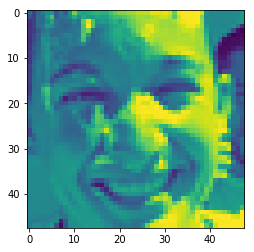

In [46]:
img=np.reshape(img,(48,48))
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()